In [ ]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd #
import random #
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import os
import cv2

plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset = 'drive/MyDrive/Dataset'
print(os.chdir(dataset))

FileNotFoundError: ignored

In [ ]:
!ls

In [ ]:
# Show loaded dataset
plt.figure(figsize=(20,20))
test_folder=r''
classes = ["Apple", "Banana", "Jackfruit", "Orange", "Watermelon"]
for i in range(5):
    file = random.choice(os.listdir(classes[i]))
    image_path= os.path.join(classes[i], file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(classes[i]+": "+file)
    plt.imshow(img)

In [ ]:
# Get the file paths and create array
labels = np.array([], dtype=np.int8)

im_files = os.listdir() # List the folders
im_array = np.array([], dtype=np.float16).reshape(0,100,100,3) # Create empty np array for storing image

for i in range (len(classes)):
    print(classes[i])
    im_files = os.listdir(classes[i])
    fruits = [plt.imread(classes[i]+"/"+f) for f in im_files]
    img_arr = np.array(fruits)
    im_array = np.vstack((im_array, img_arr))
    labels = np.append(labels, [i for f in im_files])


Apple
Banana
Jackfruit
Orange
Watermelon


In [ ]:
# Reshaping labels 
labels = labels.reshape(len(im_array),1)

In [ ]:
#im_array

In [ ]:
#print(labels)

In [ ]:
classes

['Apple', 'Banana', 'Jackfruit', 'Orange', 'Watermelon']

In [ ]:
# plt.imread('Apple/Image004.png').shape

In [ ]:
#Loading data
# from keras.datasets import cifar10
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#Train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(im_array, labels, test_size=0.25, random_state = 1)

In [ ]:
#print(y_test)

In [ ]:
#Viewing data
print(type(x_test))
print(type(y_test))
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#shape of the arrays
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(208, 100, 100, 3)
(208, 1)
(622, 100, 100, 3)
(622, 1)


In [ ]:
#Viewing first image as array
index = 1
x_train[index]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

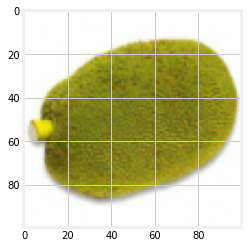

In [ ]:
#viewing first image as picture
img = plt.imshow(x_train[index])

In [ ]:
#image label
print('Image label:', y_train[index])

Image label: [2]


In [ ]:
#get image classification
classification = classes
print('Image class: ', classification[y_train[index][0]])

Image class:  Jackfruit


In [ ]:
#converting labels to set of 10 m=numbers to input into to the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#printing new labels
print('y_train:', y_train_one_hot)
print('y_test:', y_test_one_hot)

y_train: [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
y_test: [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
#New label of image above
print('The one hot label :', y_train_one_hot[index])

The one hot label : [0. 0. 1. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
# x_train = x_train / 255
# x_test = x_test / 255

In [ ]:
# x_train[index]

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.layers import Input

# load model
vgg_model =  VGG16(weights="imagenet", include_top=False, input_shape=(100, 100, 3))
vgg_model.trainable = False

# summarize the model
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                              

In [ ]:
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15,911,365
Trainable params: 1,196,677
Non

In [ ]:
#compiling model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15,911,365
Trainable params: 1,196,677
Non

In [ ]:
#Training the model
hist = model.fit(x_train, y_train_one_hot, batch_size= 64, epochs= 10, validation_split= 0.2)

Epoch 1/10
8/8 [==============================] - 61s 8s/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0283 - val_accuracy: 0.9840
Epoch 2/10
8/8 [==============================] - 61s 8s/step - loss: 0.0421 - accuracy: 0.9839 - val_loss: 0.1052 - val_accuracy: 0.9760
Epoch 3/10
8/8 [==============================] - 61s 8s/step - loss: 0.0295 - accuracy: 0.9940 - val_loss: 0.0429 - val_accuracy: 0.9840
Epoch 4/10
8/8 [==============================] - 62s 8s/step - loss: 0.0330 - accuracy: 0.9859 - val_loss: 0.0711 - val_accuracy: 0.9920
Epoch 5/10
8/8 [==============================] - 61s 8s/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0301 - val_accuracy: 0.9840
Epoch 6/10
8/8 [==============================] - 61s 8s/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.0344 - val_accuracy: 0.9920
Epoch 7/10
8/8 [==============================] - 61s 8s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 8/10
8/8 [==================

In [ ]:
#Evaluating the model using test dataset
model.evaluate(x_test, y_test_one_hot)[1]

7/7 [==============================] - 21s 3s/step - loss: 0.0671 - accuracy: 0.9856


0.9855769276618958

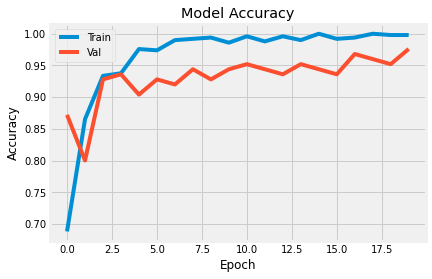

In [ ]:
#Visualizing Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

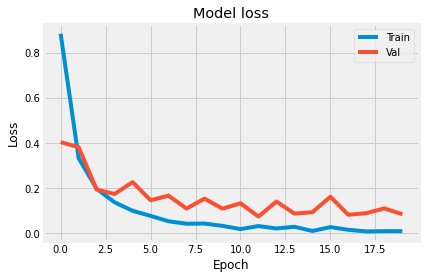

In [ ]:
#Visualizing model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
#Testing the model
from google.colab import files
uploaded = files.upload()

Saving wm.jpg to wm.jpg


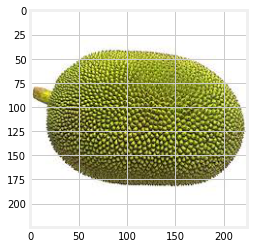

In [ ]:
#Showing image
uploaded_img = plt.imread('jackfruit2.jpg')
img = plt.imshow(uploaded_img)

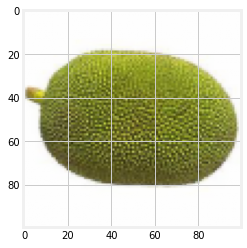

In [ ]:
#Resizing image
from skimage.transform import resize
resized_img = resize(uploaded_img, (100,100,3))
img = plt.imshow(resized_img)

In [ ]:
#Getting the models prediction
pred = model.predict(np.array([resized_img]))

#Showing predictions
pred

array([[1.6692972e-07, 1.3965709e-07, 9.9997807e-01, 2.1365324e-05,
        2.5964565e-07]], dtype=float32)

In [ ]:
#Sorting predictions descending
list_index = [0,1,2,3,4]
x = pred

for i in range(5):
  for j in range(5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
  
#showing sorted label in order
print(list_index)

[2, 3, 4, 0, 1]


In [ ]:
#print the first 5 most likely classifications
for i in range(5):
  print(classification[list_index[i]], ':', pred[0][list_index[i]]*100, '%')

Jackfruit : 99.99780654907227 %
Orange : 0.0021365323846112005 %
Watermelon : 2.5964564542846347e-05 %
Apple : 1.669297233775069e-05 %
Banana : 1.396570894485194e-05 %


In [ ]:
print("Predicted Class:", classification[list_index[0]])

Predicted Class: Jackfruit


In [ ]:
model.save('savedModelVGG')

INFO:tensorflow:Assets written to: savedModelVGG/assets


In [ ]:
model.load_weights('savedModelVGG')

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred.shape

(208, 5)

In [ ]:
classes

['Apple', 'Banana', 'Jackfruit', 'Orange', 'Watermelon']

In [ ]:
np.sum(y_test_one_hot, axis=0)

array([47., 47., 30., 29., 55.], dtype=float32)

* Appla = 46/47
* Banana = 47/47
* Jackfruit = 30/30
* Orange = 27/29
* Watermelon = 55/55

In [ ]:
np.set_printoptions(suppress=True, precision=1)
for i in range(len(x_test)):
    print(y_test_one_hot[i], pred[i], model.evaluate([x_test[i:i+1]], [y_test_one_hot[i:i+1]], verbose=0)[1], classes[y_test[i][0]])

[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 1. 0.] [0.9 0.  0.  0.1 0. ] 0.0 Orange
[1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] 1.0 Apple
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.] 1.0 Jackfruit
[0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] 1.0 Banana
[0. 0. 0. 1. 0.] [0.3 0.  0.  0.7 0. ] 1.0 Orange
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] 1.0 Banana
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] 1.0 Orange
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.] 1.0 Jackfruit
[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] 1.0 Watermelon
[1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] 1.0 Apple
[1. 0. 0. 0. 